In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [3]:
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 15
plt.rc('legend',fontsize=15) # using a size in points
import pygtc


In [4]:
plabels = ["$M_{*}$", "$\\alpha$", "$\\sigma$"," $\\gamma$", "$\\beta$", "$\\tau$"]

priors = [[9.5,11.5], [-1,7], [0,5], [-2,2], [-3,2], [-2,2]]

fixed = [False, True, True, False, False, False]

### first the alpha permutations

In [5]:
alpha1 = jsm_mcmc.Chain("../../../data/paper/mock_permutations_a2/model_A/alpha/mock_1/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=25)

alpha2 = jsm_mcmc.Chain("../../../data/paper/mock_permutations_a2/model_A/alpha/mock_2/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=25)

alpha3 = jsm_mcmc.Chain("../../../data/paper/mock_permutations_a2/model_A/alpha/mock_3/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=25)

alpha4 = jsm_mcmc.Chain("../../../data/paper/mock_permutations_a2/model_A/alpha/mock_4/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=25)

alpha5 = jsm_mcmc.Chain("../../../data/paper/mock_permutations_a2/model_A/alpha/mock_5/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=25)

In [6]:
save_file = "../../../paper_1/figures/alpha_perm.pdf"

model_color = "darkcyan"

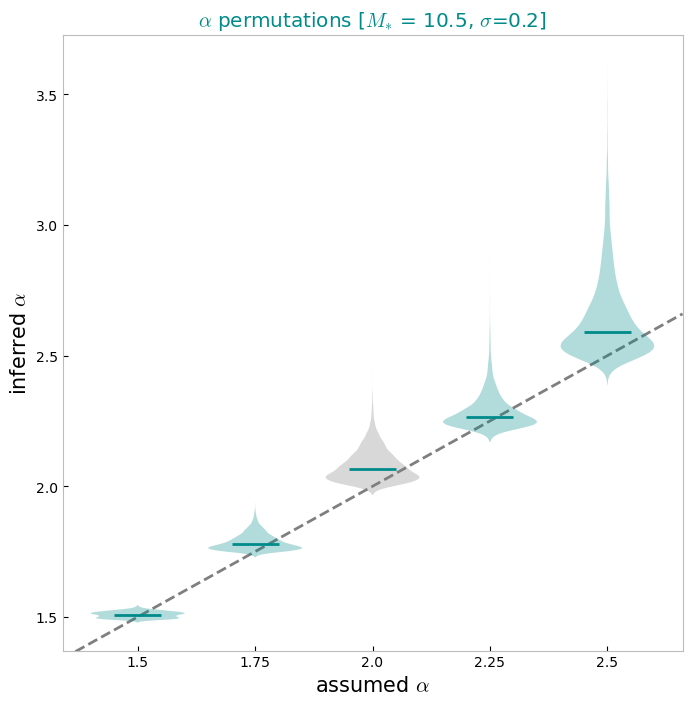

In [7]:
alpha_permutations = [1.5, 1.75, 2.0, 2.25, 2.5]

data = [alpha2.clean[:,0], alpha3.clean[:,0],  alpha1.clean[:,0], alpha4.clean[:,0], alpha5.clean[:,0]]

# Create a violin plot
plt.figure(figsize=(8, 8))
plt.title("$\\alpha$ permutations [$M_{*}$ = 10.5, $\\sigma$=0.2]", color=model_color)
violins = plt.violinplot(data, showmeans=False, showmedians=True, positions=alpha_permutations, widths=0.2, showextrema=False)

for i, violin in enumerate(violins['bodies']):
    if i == 2:
        violin.set_facecolor("grey")
    else:
        violin.set_facecolor(model_color)

violins['cmedians'].set_color(model_color)

plt.xticks(alpha_permutations, ['1.5', '1.75', '2.0', '2.25', '2.5'])
plt.ylabel('inferred $\\alpha$', fontsize=15)
plt.xlabel("assumed $\\alpha$", fontsize=15)

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='black', scalex=False, scaley=False, zorder=0, alpha=0.5)

#plt.savefig(save_file, bbox_inches='tight')

plt.show()


### now sigma

In [8]:
sigma1 = jsm_mcmc.Chain("../../../data/paper/mock_permutations_a2/model_A/sigma/mock_1/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=25)

sigma2 = jsm_mcmc.Chain("../../../data/paper/mock_permutations_a2/model_A/sigma/mock_2/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=25)

sigma3 = jsm_mcmc.Chain("../../../data/paper/mock_permutations_a2/model_A/sigma/mock_3/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=25)

sigma4 = jsm_mcmc.Chain("../../../data/paper/mock_permutations_a2/model_A/sigma/mock_4/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=25)

In [9]:
save_file = "../../../paper_1/figures/sigma_perm.pdf"
model_color = "darkcyan"

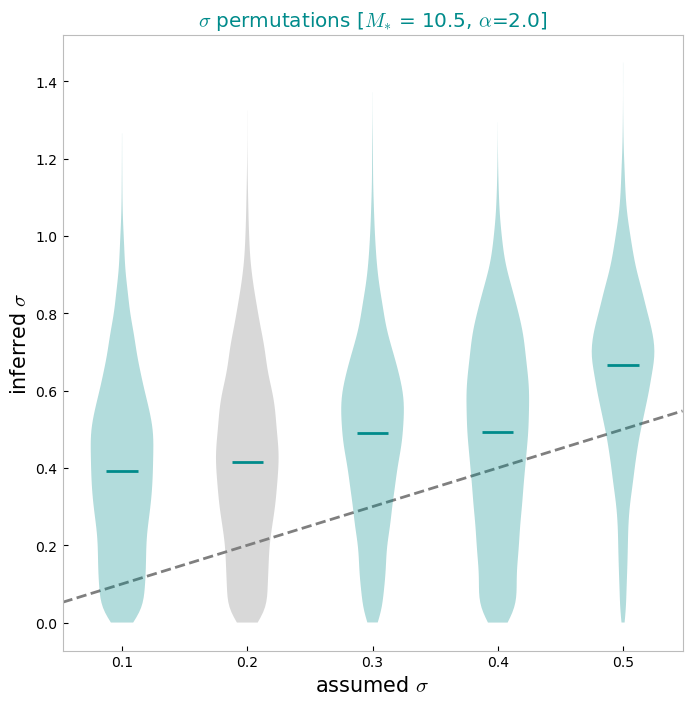

In [10]:
sigma_permutations = [0.1, 0.2, 0.3, 0.4, 0.5]

data = [sigma1.clean[:,1], alpha1.clean[:,1], sigma2.clean[:,1], sigma3.clean[:,1], sigma4.clean[:,1]]

# Create a violin plot with custom x values and colors
plt.figure(figsize=(8, 8))
plt.title("$\\sigma$ permutations [$M_{*}$ = 10.5, $\\alpha$=2.0]", color=model_color)
violins = plt.violinplot(data, showmeans=False, showmedians=True, positions=sigma_permutations, widths=0.05, showextrema=False)

for i, violin in enumerate(violins['bodies']):
    if i == 1:
        violin.set_facecolor("grey")
    else:
        violin.set_facecolor(model_color)

violins['cmedians'].set_color(model_color)

plt.xticks(sigma_permutations, ['0.1', '0.2', '0.3', '0.4', '0.5'])
plt.ylabel('inferred $\\sigma$', fontsize=15)
plt.xlabel("assumed $\\sigma$", fontsize=15)


xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', scalex=False, scaley=False, zorder=0, alpha=0.5)

#plt.savefig(save_file, bbox_inches='tight')

plt.show()


In [11]:
data = [alpha2.clean, alpha3.clean,  alpha1.clean, alpha4.clean, alpha5.clean]

chain_labels = ["$\\alpha = $" + alpha2.constraints[0] + "\n $\\sigma = $" + alpha2.constraints[1],
                "$\\alpha = $" + alpha3.constraints[0] + "\n $\\sigma = $" + alpha3.constraints[1],
                "$\\alpha = $" + alpha1.constraints[0] + "\n $\\sigma = $" + alpha1.constraints[1],
                "$\\alpha = $" + alpha4.constraints[0] + "\n $\\sigma = $" + alpha4.constraints[1],
                "$\\alpha = $" + alpha5.constraints[0] + "\n $\\sigma = $" + alpha5.constraints[1]]

In [12]:
hmm = np.array([[1.5, 0.2], [1.75, 0.2], [2.0, 0.2], [2.25, 0.2], [2.5, 0.2]])

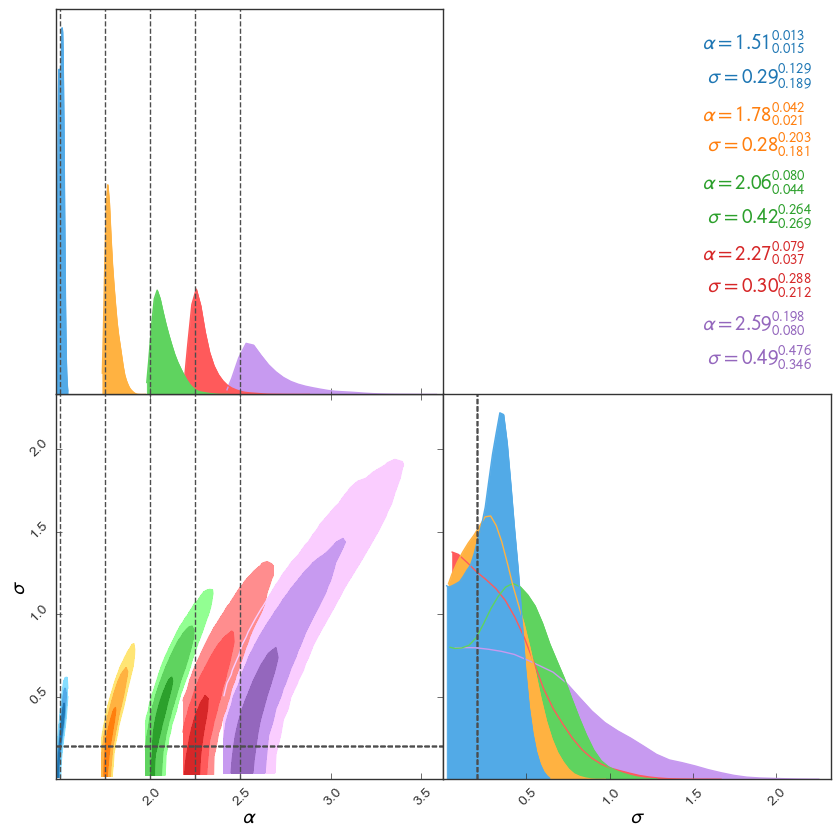

In [13]:
test = jsm_mcmc.MulitChain(data, chain_labels, hmm, fixed)
test.plot_posteriors(truths=hmm, truthColors=["#4d4d4d"]*6, truthLineStyles=["--"]*6, filledPlots=True)

In [14]:
data = [sigma1.clean, alpha1.clean, sigma2.clean, sigma3.clean, sigma4.clean]

chain_labels = ["$\\alpha = $" + sigma1.constraints[0] + "\n $\\sigma = $" + sigma1.constraints[1],
                "$\\alpha = $" + alpha1.constraints[0] + "\n $\\sigma = $" + alpha1.constraints[1],
                "$\\alpha = $" + sigma2.constraints[0] + "\n $\\sigma = $" + sigma2.constraints[1],
                "$\\alpha = $" + sigma3.constraints[0] + "\n $\\sigma = $" + sigma3.constraints[1],
                "$\\alpha = $" + sigma4.constraints[0] + "\n $\\sigma = $" + sigma4.constraints[1]]

hmm = np.array([[2.0, 0.1], [2.0, 0.2], [2.0, 0.3], [2.0, 0.4], [2.0, 0.5]])

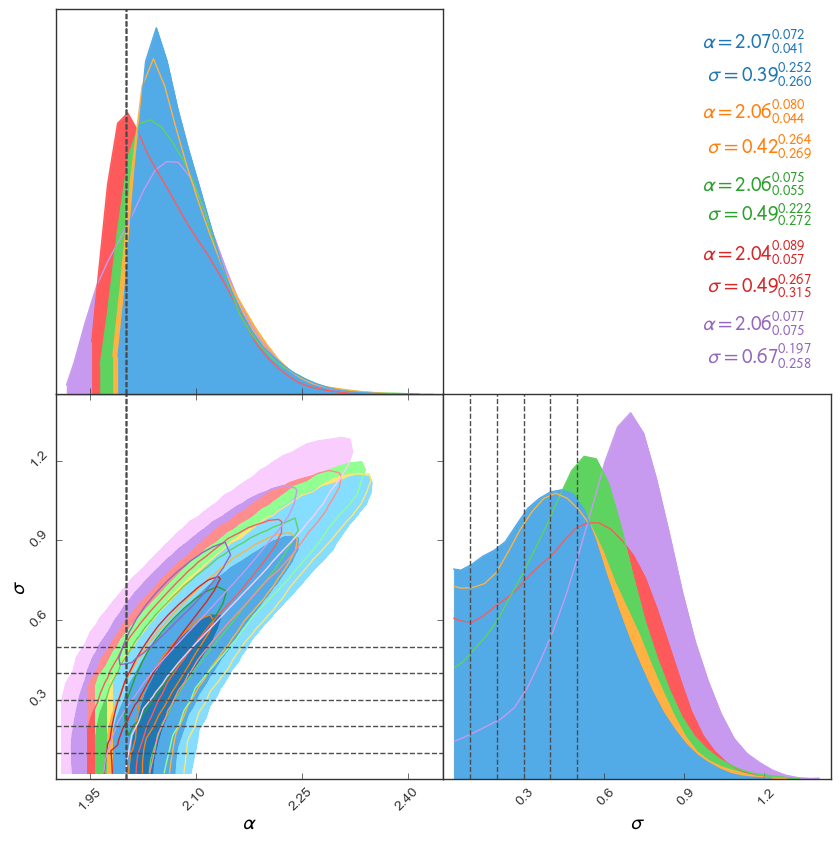

In [15]:
test = jsm_mcmc.MulitChain(data, chain_labels, hmm, fixed)
test.plot_posteriors(truths=hmm, truthColors=["#4d4d4d"]*6, truthLineStyles=["--"]*6, filledPlots=True)

In [16]:
# host_halo_PDF = np.load("../../../SatGen/etc/halo_mass_PDF_full.npy")
# samples = np.random.choice(host_halo_PDF[:,0], size=10000, p=host_halo_PDF[:,1]/np.sum(host_halo_PDF[:,1])) 

# binz = np.linspace(11,14,40)
# normal = np.random.normal(loc=12, scale=0.15, size=(10000))

In [17]:
# plt.hist(normal, bins=binz, edgecolor="white", label="lognormal $\\sigma=0.15$", alpha=0.5)
# plt.hist(samples, bins=binz, edgecolor="white", label="CLF", alpha=0.5)
# plt.xlabel("log $M_{host}$")
# plt.legend()
# plt.show()